In [2]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as N
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree


In [6]:
nclu=NetCDFFile('run_conus_agu_2017/FW_rcp45_max.nc','r')
ncvar_maize = nclu.variables['FW'][:]
latnc = nclu.variables['latitude'][:]
# znc = nclu.variables['level'][:]
lonnc = nclu.variables['longitude'][:]
# timenc = nclu.variables['time'][:]

nclu1=NetCDFFile('run_conus_agu_2017/FW_rcp85_max.nc','r')
maize = nclu1.variables['FW'][:]


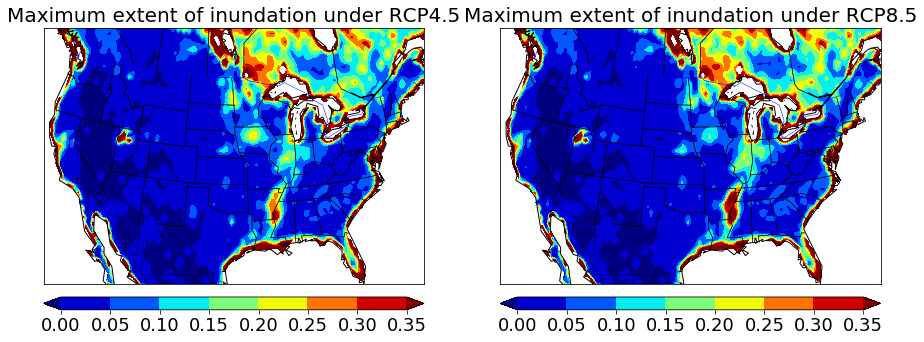

In [7]:
#http://matplotlib.org/basemap/users/mapsetup.html

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(121)
ax1.set_title("Maximum extent of inundation under RCP4.5",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = N.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
# clevs = N.arange(0,7,0.5)
clevs = clevs = N.arange(0,0.4,0.05)

#ncvar_maize[0,0,:,:][N.isnan(ncvar_maize[0,0,:,:])] = -9999
#maize[0,1,:,:][N.isnan(maize[0,1,:,:])] = -9999
ncvar_maize[0,:,:] = ma.masked_where(ncvar_maize[0,:,:]<0,ncvar_maize[0,:,:])
#ncvar_maize[0,0,:,:] = ma.masked_where(ncvar_maize[0,0,:,:]<=0,ncvar_maize[0,0,:,:])
#ncvar_maize[0,0,:,:] = ma.masked_where(maize[0,1,:,:]<=0,ncvar_maize[0,0,:,:])
mdata = maskoceans(lon, lat, ncvar_maize[0,:,:])

cs1 = map.contourf(x,y,ncvar_maize[0,:,:],clevs,cmap=plt.cm.jet,vmin=0,vmax=0.35,extend='both')
#cs1 = map.pcolormesh(x,y,ncvar_maize[0,:,:],cmap=plt.cm.jet,vmin=0,vmax=0.35)
cbar = map.colorbar(cs1,location='bottom',pad="5%")
#plt.title('Maize harvested area fraction')
cbar.ax.tick_params(labelsize=18) 


ax2 = fig.add_subplot(122)
ax2.set_title("Maximum extent of inundation under RCP8.5",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
clevs = N.arange(0,0.4,0.05)
cs = map.contourf(x,y,maize[0,:,:],clevs,cmap=plt.cm.jet,vmin=0,vmax=0.35,extend='both')
#cs = map.pcolormesh(x,y,maize[0,:,:],cmap=plt.cm.jet,vmin=0,vmax=0.35)

cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.ax.tick_params(labelsize=18) 

plt.show()
#plt.savefig('Proj_SWAMPS.jpg',dpi=300)